# Missing Values Featuring Engineering (DAY-1)

# Data that will be missing---?

1. Continuous data
2. Categorical data

# What are different types of missing data?

1. ##### Missing completely at Random, (MCAR)

A variable is missing completely at random (MCAR) if the probability of being missing is same for all the observation. when data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing eithin the datasets. In otheer words those missing data points are a random subset of the data. There is nothing systematic going on that make some data more likely to be missing than other.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


2. ##### Missing data not at random(MNAR): Sysematic missing value
There is absolutely no relationship between the data missing and any other values, observed or missing within the datasets.

In [7]:
import numpy as np
df['Cabin_null']=np.where(df['Cabin'].isnull(),1,0)


##find the percentage of null values
df['Cabin_null'].mean() 

0.7710437710437711

In [8]:
df['Cabin_null']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Cabin_null, Length: 891, dtype: int64

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [10]:
# if people survive than value is 1 and if not ssurvive value is 0 in cabin_null columns
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

3. ##### Missing at random(MAR):

Man --- Who is hide their salary

Women --- hide their age

means missing at random those values which are not given by the person

#### All the techniques of handling the missing values

1. Mean/Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution Imputation
5. Arbitrary Imputation
6. Frequent categories Imputation

#### Mean/Mode/Median impuutation
when should we apply this ----
Mean/Median imputation has the assumption that the data are missing completely at random(MCAR). 
we solve this by replacing thr NAN with most frequent Occurance oh the variable

In [11]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
# check the percentage of missing value using mean
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [13]:
def impute_nan(df, variable, median):
    df[variable+'_median']=df[variable].fillna(median)

In [14]:
median = df.Age.median()
median

28.0

In [15]:
impute_nan(df, 'Age', median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [16]:
# check the standard deviation of age and age_median columns
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


as we see there is a minor difference so we go ahead

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

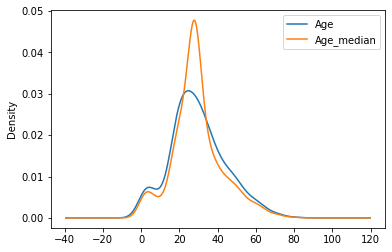

In [18]:
# kde = kernal density estimators
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_median'].plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages and Disadvantages of mean/median imputation

#### Advantages:-

1. EAsy to implement(Robust to  outliers)
2. Faster way to obtain the complete datasets

#### Disadvantages:-

1. Change or distortion in the original variance
2. Impacts corelation

# SECOND DAY FEATURING ENGINEERING-MISSING Values

#### Random Sample Imputation 

Aim: Random Sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used?

It assumes that the data are missing completely at random(MCAR) 

In [19]:
import pandas as pd
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [20]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [21]:
df.isnull().mean() # get the % of null values

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [22]:
df['Age'].isnull().sum()

177

In [23]:
# get the random nan values from column  random_state is used for not changing the result after every time 
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [24]:
# create a function to replace nan vaalues with  random values

def impute_nan1(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill NA
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas impute_nan1(df,"Age",median)need to have same index in order to merge the datasets
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sampleimpute_nan1(df,"Age",median)

In [25]:
median=df.Age.median()

In [26]:
median

28.0

In [27]:
impute_nan1(df,"Age",median)

In [28]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

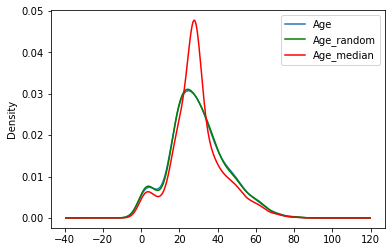

In [30]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_random'].plot(kind='kde', ax=ax, color='green')
df['Age_median'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##### checking with mean and see the changes in graph

In [31]:
median=df.Age.mean()
median

29.69911764705882

In [32]:
impute_nan1(df,"Age",median)

In [33]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


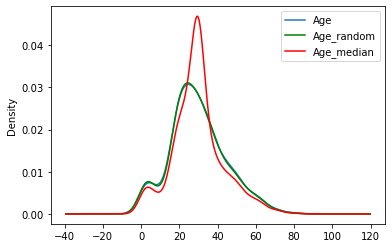

In [34]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_random'].plot(kind='kde', ax=ax, color='green')
df['Age_median'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##### As we see above that median have less distortion as compare to mean. Becaause median remove the outliers from the data

##### Advantages 
1. EAsy to implement
2. There is less distortion in variance


##### Disadvantages

1. In Every situation randomness wont work

##### capturing NAN values with a new feature

It works well if the data is not missing completely at random 

In [37]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [38]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [39]:
import numpy as np
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)

In [40]:
# rplace the nan values with median in age column and 1 value in age_nan coloumn tell that there is a missing value
df.Age.fillna(df.Age.median(),inplace=True)

In [41]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### In this where the value is present the value of age_nan column is zero and where the value is not present the value will be 1

In [42]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


##### Advantages 

1. EAsy to Impliment
2. It capture the importance of missing values

##### Disadvantage

1. creating aditionals features(curse of dimensionality)


##### End of Distribution Imputation

If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable.

In [43]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


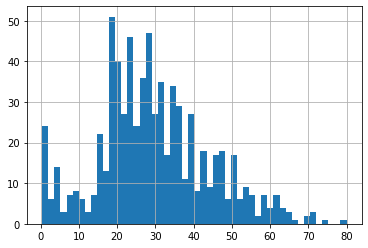

In [44]:
df.Age.hist(bins=50)

##### As we see above the value which is aways from 3rd standaed deviation is  replacd with nan values 

In [46]:
extreme = df.Age.mean()+3*df.Age.std()

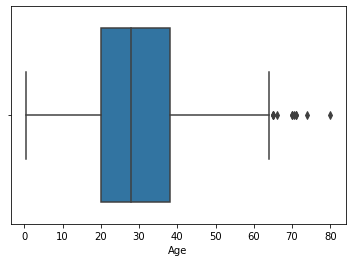

In [47]:
import seaborn as sns
sns.boxplot('Age',data=df)

##### Black dotes are outliers in the datasets

In [49]:
def impute_nan2(df,variable,median,extreme):
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [50]:
impute_nan2(df,"Age",df.Age.median(),extreme)

In [51]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


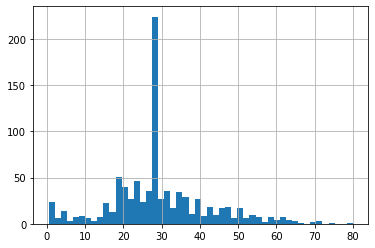

In [52]:
df.Age.hist(bins=50)

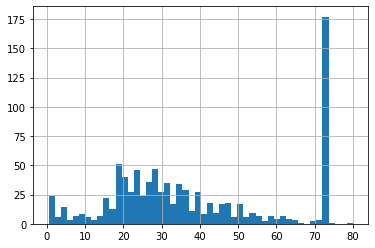

In [53]:
df.Age_end_distribution.hist(bins=50)

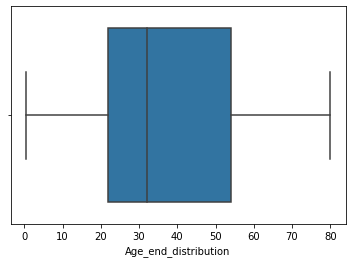

In [54]:
sns.boxplot('Age_end_distribution', data=df)

##### As we see above the outlier are remove from the data 

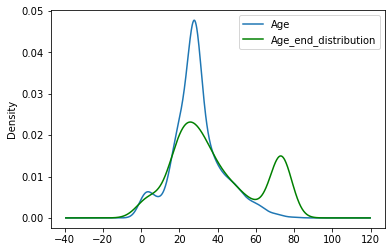

In [55]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_end_distribution'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##### Advantages

1. Easy to Implement
2. Capture the importence of missing values

##### Disadvantages

1. Distorts the original disstribution of the variable
2. If missing is not important, it may mask the predictive power of the original variable by distorting its distribution
3. If the number of NA is buig. It will mask true outliers in the distribution.
4. If the number of NA is small, the replaced NA may be considered an oulier and pre-processed in a subsequent step of  feature engineering

# Feature Engineering- Missing Values Day-3

#### Arbitrary Value Imputation

This techniques was derived from Kaggle competition.
It consist of replacing NAN by an arbitrary value

NOTE:
In this techniques we will take the last oulier from the dataset

In [56]:
import pandas as pd
df= pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [57]:
def impute_nan3(df,variable):
    df[variable]=df[variable].fillna(100)

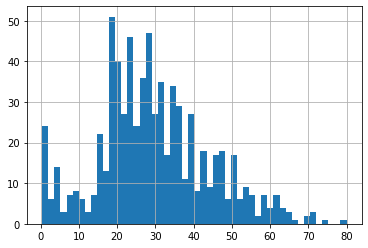

In [58]:
df['Age'].hist(bins=50)

### Arbitrary values

1. It shoul be more frequently present

### Advantages

1. Easy to implement
2. Captures the importance of missingness if there is one


### Disadvantages

1. Disorts the original distribution of the variable
2. If missingness is not important, It may mask the predective power of the original variable by disorting its distribution
3. Hard to decide which value to use

##### Ordina Number encoding 

### In ordinal number encoding we assign a rank as per the importance of category like grading system grade - A(1),B(2),C(3),D(4),F(5)

In [59]:
import datetime

In [60]:
today_date = datetime.datetime.today()

In [61]:
today_date

datetime.datetime(2020, 10, 26, 22, 38, 23, 757045)

In [62]:
today_date-datetime.timedelta(2) # this give the difference b/w date time

datetime.datetime(2020, 10, 24, 22, 38, 23, 757045)

In [63]:
# List Comprehension
days = [today_date-datetime.timedelta(x) for x in range(0,15)]

In [64]:
import pandas as pd
data = pd.DataFrame(days)
data.columns=['Day']

In [65]:
data.head()

,Day
0,2020-10-26 22:38:23.757045
1,2020-10-25 22:38:23.757045
2,2020-10-24 22:38:23.757045
3,2020-10-23 22:38:23.757045
4,2020-10-22 22:38:23.757045


In [66]:
data['Day'].dt.month

0     10
1     10
2     10
3     10
4     10
5     10
6     10
7     10
8     10
9     10
10    10
11    10
12    10
13    10
14    10
Name: Day, dtype: int64

In [67]:
data['weekday']=data['Day'].dt.day_name() # we can get anthing from datetime like day name 

In [68]:
data.head()

,Day,weekday
0,2020-10-26 22:38:23.757045,Monday
1,2020-10-25 22:38:23.757045,Sunday
2,2020-10-24 22:38:23.757045,Saturday
3,2020-10-23 22:38:23.757045,Friday
4,2020-10-22 22:38:23.757045,Thursday


In [69]:
dictionary={
    'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7
}

In [70]:
dictionary

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [71]:
# mapping the values of weekdays 
data['weekday_ordinal']=data['weekday'].map(dictionary)

In [72]:
data.head()

,Day,weekday,weekday_ordinal
0,2020-10-26 22:38:23.757045,Monday,1
1,2020-10-25 22:38:23.757045,Sunday,7
2,2020-10-24 22:38:23.757045,Saturday,6
3,2020-10-23 22:38:23.757045,Friday,5
4,2020-10-22 22:38:23.757045,Thursday,4


#### Count Or Frequency Encoding

In [73]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None,index_col=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [74]:
len(df[1].unique())

9

In [75]:
columns = [1,3,5,6,7,8,9,13]

In [76]:
data = df[columns]

In [77]:
data.columns=['Employment','Degree','Martial Status','Designation','Family_job','Race','Sex','Country']

In [78]:
data.head()

,Employment,Degree,Martial Status,Designation,Family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [79]:
# find how many categories are present in this data sets
for i in  data.columns[:]:
    print(i,':',len(data[i].unique()), 'labels')

Employment : 9 labels
Degree : 16 labels
Martial Status : 7 labels
Designation : 15 labels
Family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [80]:
country_map = data['Country'].value_counts().to_dict()

In [81]:
country_map

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Cambodia': 19,
 ' Trinadad&Tobago': 19,
 ' Laos': 18,
 ' Thailand': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [82]:
data['Country']=data['Country'].map(country_map)

<ipython-input-82-a03bfcd8faaf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Country']=data['Country'].map(country_map)


In [83]:
data.head(20)

,Employment,Degree,Martial Status,Designation,Family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170


### Just do with other variable

##### Advantages:-

1. Easy to Use
2. Not increasing any feature space

##### Disadvantages:-

1. It will provide the same weight if the frequencies are same (Category counts are same )

## Target Guided Ordinal Encoding
1. Ordering the labels according to the targets
2. Replace the labels by the joint Probability of being 1 or 0

In [86]:
import pandas as pd
df = pd.read_csv('titanic.csv', usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [87]:
df['Cabin'].fillna('Missing',inplace=True)

In [88]:
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [89]:
df['Cabin']=df['Cabin'].astype('str').str[0]

In [90]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [91]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [92]:
# finf the survived % in each cabin
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [93]:
ordinal_labels=df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [94]:
# based on the ranking assingning values
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}

In [95]:
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [96]:
df['cabin_ordinal_labels']=df['Cabin'].map(ordinal_labels2)
df.head()

,Survived,Cabin,cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


### Now we should drop the cabin column

# Mean Encoding 

### In this mean encoding the category is replace with the mean of that coloumns

In [98]:
mean_ordinal=df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [99]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [101]:
df['mean_ordinal_encode']=df['Cabin'].map(mean_ordinal)


In [102]:
df.head()

,Survived,Cabin,cabin_ordinal_labels,mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


#### Advantages:-
1. It Capture the monotomic relationship b/w variable and target

#### Disadvantages:-
1. It pronce to over fittiing

# How to handle Categorical missing values

##### Frequent category Imputation


In [103]:
import pandas as pd
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


### df.columns

#### Note for getting the column name use this

In [105]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [106]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

### Find the most frequesnt category in all variables

In [107]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=True)

BsmtQual
Fa     35
Ex    121
Gd    618
TA    649
Name: BsmtQual, dtype: int64

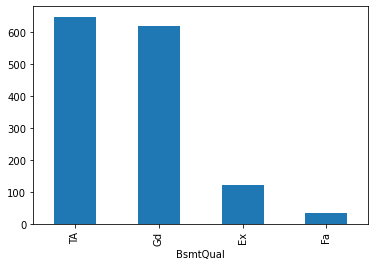

In [108]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

##### we can use this also instead of groupby

In [109]:
df['BsmtQual'].value_counts().sort_values(ascending=True)

Fa     35
Ex    121
Gd    618
TA    649
Name: BsmtQual, dtype: int64

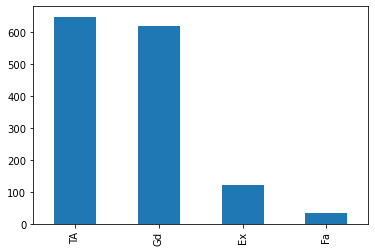

In [110]:
df['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()

#### In BsmtQl column the most frequent categorical value is TA

In [112]:
df['GarageType'].value_counts().sort_values()

2Types       6
CarPort      9
Basment     19
BuiltIn     88
Detchd     387
Attchd     870
Name: GarageType, dtype: int64

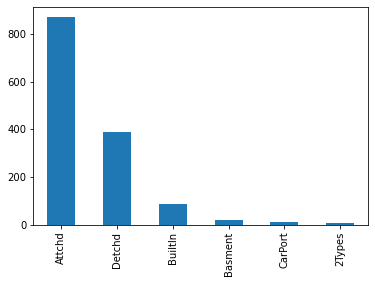

In [113]:
df['GarageType'].value_counts().sort_values(ascending=False).plot.bar()

### In GarageType column most frequent categorical value is Attchd

In [114]:
df['FireplaceQu'].value_counts().sort_values(ascending=True)

Po     20
Ex     24
Fa     33
TA    313
Gd    380
Name: FireplaceQu, dtype: int64

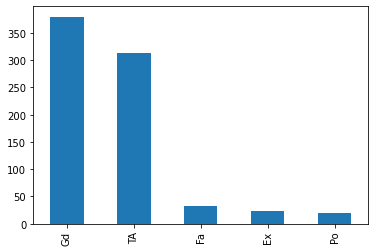

In [115]:
df['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()

### In FireplaceQu column most frequent categorical value is Gd

In [116]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [117]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [118]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

#### (OR) we can use mode instead of value_counts()

In [119]:
df['GarageType'].mode()

0    Attchd
dtype: object

In [120]:
df['GarageType'].mode()[0]

'Attchd'

In [121]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category)

In [122]:
for i in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,i)

In [123]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

#### As we see above most frequent category techineq to fill the categorical missing values

#### Advantages:-

1. Easy to impliment
2. Good for less number of missing values variable.
3. Faster way to impliment

#### Disadvantage:-

1. Since we are using more frequent labels it may use them in an over represented way if there are many nan values
2. It distorts the relation of the most frequent label.

# Adding a veriable to capture NAN

In [124]:
import numpy as np
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [125]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [126]:
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [127]:
frequent=df['BsmtQual'].mode()[0]

In [128]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [129]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [130]:
# for fireplacequ column
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,NaN,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [131]:
frequent1 = df['FireplaceQu'].mode()[0]

In [132]:
df['FireplaceQu'].fillna(frequent1)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,NaN,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


#### suppose we have multiple nan category values , we just replace with another category. And you just give any name to that category.

In [133]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [134]:
def impute_nan(df,variable):
    df[variable+'_var']=np.where(df[variable].isnull(),'Misiing',df[variable])

In [135]:
for i in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,i)

In [136]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var,GarageType_var
0,Gd,NaN,Attchd,208500,Gd,Misiing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


#### After apply this techique we just drop the nan values columns b/cwe dont need thaose columns

In [138]:
df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

,SalePrice,BsmtQual_var,FireplaceQu_var,GarageType_var
0,208500,Gd,Misiing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Misiing,Attchd


## Now we buil a model and predict the saleprice 

##### Handle categorical feature

### One Hot Encoding

In [139]:
import pandas as pd

In [140]:
df = pd.read_csv('titanic.csv', usecols=['Sex'])
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [141]:
df.isnull().sum()

Sex    0
dtype: int64

In [142]:
pd.get_dummies(df).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [143]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [144]:
df = pd.read_csv('titanic.csv', usecols=['Embarked'])
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [145]:
# check the unique categories
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [146]:
# frop nan value
df.dropna(inplace=True)

In [147]:
pd.get_dummies(df,drop_first=False).head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [148]:
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In the above cell we see that if 1 is present in columns that means that , that categorie is present and if there is 0 for both the column that mean a third column i.e embarked_c is present

### Onehotencoding with many categories in a feature

In [149]:
df=pd.read_csv('Mercedies.csv',usecols=['X0','X1','X2','X3','X4','X5','X6'])
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [150]:
df.shape

(4209, 7)

In [151]:
# for i in df.columns:
#     print(df[i].value_counts())
df['X0'].value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
aq     18
i      18
am     18
u      17
aw     16
l      16
ad     14
au     11
k      11
b      11
as     10
r      10
bc      6
ao      4
c       3
aa      2
q       2
ab      1
g       1
ac      1
Name: X0, dtype: int64

In [152]:
df['X0'].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [153]:
# count of total category present in all columns
for i in df.columns:
    print(len(df[i].unique()))
    

47
27
44
7
4
29
12


### As we see there is lots of feature categories so we cannot perform onehotencoding , so we use basicall we take top most frequent categorie and drop rest of them

In [154]:
# get the top 10 most frequent categories occurs 
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [155]:
top_10 = [x for x in df.X1.value_counts().sort_values(ascending=False).head(10).index]
top_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [156]:
lst_10=df.X1.value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10)

In [157]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [158]:
import numpy as np
for cat in lst_10:
    df[cat]=np.where(df['X1']==cat,1,0)
    

In [160]:
df[['X1']+top_10].head(20)

,X1,aa,s,b,l,v,r,i,a,c,o
0,v,0,0,0,0,1,0,0,0,0,0
1,t,0,0,0,0,0,0,0,0,0,0
2,w,0,0,0,0,0,0,0,0,0,0
3,t,0,0,0,0,0,0,0,0,0,0
4,v,0,0,0,0,1,0,0,0,0,0
5,b,0,0,1,0,0,0,0,0,0,0
6,r,0,0,0,0,0,1,0,0,0,0
7,l,0,0,0,1,0,0,0,0,0,0
8,s,0,1,0,0,0,0,0,0,0,0
9,b,0,0,1,0,0,0,0,0,0,0


#### Probability Ratio Encoding
1. Probability of survived based on cabin --- categorical feature
2. probability of not Survived ---1--pr(Survived)
3. Pr(survived)/pr(Not Survived)
4. Dictonary to map cabin with probability
5. replace with the categorical feature

In [161]:
import pandas as pd

In [162]:
 df=pd.read_csv('titanic.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [163]:
# replacing nan values 
df['Cabin'].fillna('Missing',inplace=True)

In [164]:
df.Cabin.unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [165]:
# getting the fir letter from cabin column
df['Cabin']=df['Cabin'].astype(str).str[0]
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [166]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [167]:
prob_df = df.groupby(['Cabin'])['Survived'].mean()

In [168]:
# probability of person survived based on the cabin
prob_df = pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [169]:
prob_df['Died']=1-prob_df['Survived']

In [170]:
prob_df.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [171]:
prob_df['Probabilit_ratio']=prob_df['Survived']/prob_df['Died']
prob_df.head()

,Survived,Died,Probabilit_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [172]:
probability_encoded=prob_df['Probabilit_ratio'].to_dict()
df['Cabin_encoded']=df['Cabin'].map(probability_encoded)
df.head(20)

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
5,0,M,0.428274
6,0,E,3.000000
7,0,M,0.428274
8,1,M,0.428274
9,1,M,0.428274


# Transformation of Feature

##### Why Transformationof features are Required?
1. Linear Regression --- Gradient Descent ----- Global Minima
2. Alogorith like KNN, K Means, Hierarical Clustring -- Eucledian Distance

f1  f2

24  56

21  100

45  67

P1=(X1,Y1) = (24,56)

P2=(X2,Y2) = (30,70)

Note:- To find the Eucledian distance we need integer value only.


If Interviewer say Transformation , scaling is require for all the ML Algorith . 
Answer (NO) Alogorith in which Transformation , Scaling is required are KNN, K Means ,Hierarical Clustring, Logistic Regression, Linear Regression. 


Transform the values is because if we have a large eucledian distance to compress the euclidean distance we use transformation the variable.


### Deep Learning Techniques.
 For all these techniques Standardization, Scaling is required.
 1. ANN--->Global Minima, Gradient
 2. CNN
 3. RNN
 
 If Interviewer asked you Standardization, Scaling is required.
 Answer (YES) 
 
 Note:- 0-255 pixel in image classification range we use Scaling to scale down that range in b/w 0 to 1.

### Types of Transformation
1.NORMALIZATION And STANDARDIZATION

2.Scaling to Minimum And Maximum Values

3.Scaling to Median And Quantiles

4.Gaussian TRansforamtion

    Lograthmic Transformation
    Reciprocal Transformation
    Square Root Transformation
    Exponential Transformation
    Box Cox Transformation
    

Impact of scaling is increase in accuracy .

##### Standardization
We try to bring all the variables or features to a similar scale.

Stardardization mean centering the variable zero

### Z=(x-x_mean)/std

In [173]:
import pandas as pd

In [174]:
# use integer coloumns only
df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [175]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [176]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [177]:
#### standardization: we use the standardscaler from sklearn Library
from sklearn.preprocessing import StandardScaler

In [178]:
scaler=StandardScaler() 

# fit v/s fit_transform
df_scaled=scaler.fit_transform(df)

In [179]:
pd.DataFrame(df_scaled)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [180]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <a list of 20 Patch objects>)

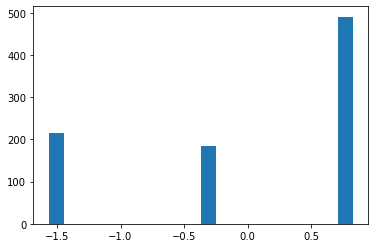

In [181]:
plt.hist(df_scaled[:,1],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <a list of 20 Patch objects>)

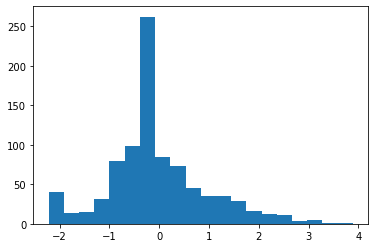

In [182]:
plt.hist(df_scaled[:,2],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <a list of 20 Patch objects>)

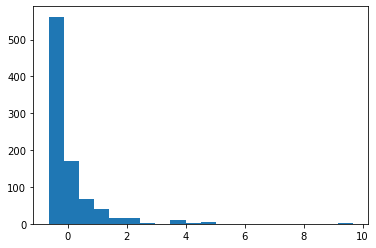

In [183]:
plt.hist(df_scaled[:,3], bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <a list of 20 Patch objects>)

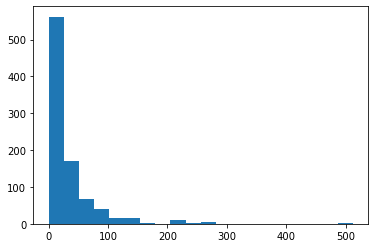

In [184]:
plt.hist(df['Fare'], bins=20)

#### As we see in the above 2 cells the data is distributed as right skwed

In [186]:
import pandas as pd
import numpy as np

### Min Max Scalinh scale the value b/w 0 to 1

X_scaled = (X-X.min) / (X.max -X.min)

In [188]:
df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [189]:
df['Age'].fillna(df.Age.median(),inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [190]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)

In [191]:
# all the value is scaling down b/w 0 to 1 
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

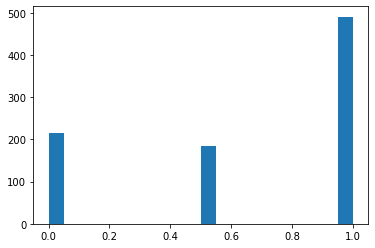

In [192]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df_minmax['Pclass'], bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

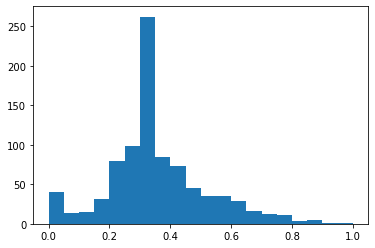

In [193]:
plt.hist(df_minmax['Age'], bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

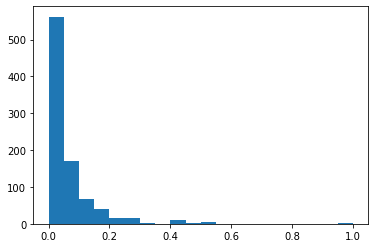

In [194]:
plt.hist(df_minmax['Fare'], bins=20)

# at the point 10 on x-axis there is a outlier b/c it more far away from all the values

### Robust Scaler

It is used to  scale the feature to median and quantile.

Scaling using median and quantile consists of subtracting the median to all teh observation , and then dividing by the interquantile difference. The interquantile difference is the difference b/w the 75th and 25th quantile.

IQR = 75th quantile -25th quantile

X_scaled = (X-X.median) / IQR

In [195]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
# df_robust=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <a list of 20 Patch objects>)

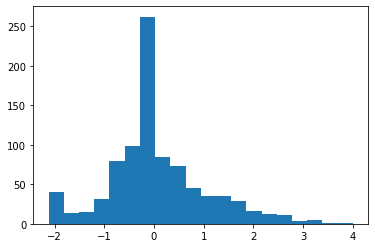

In [196]:
plt.hist(df_robust['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <a list of 20 Patch objects>)

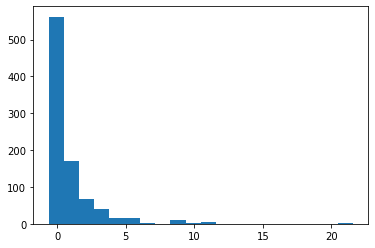

In [197]:
plt.hist(df_robust['Fare'],bins=20)

#### as we see in above figure there is a outlier in data b/c the data range is -something to +20 in Fare column but in age column  range is -2 to 4 and this a actual range

## Gaussian Transform

Some ML algorithms like linear and logistic assume that the feature are normally distributed -Accuracy -Performance

1. Logarathmic transformation
2. Reciprocal transformation
3. Square root transformation
4. Exponential transformation (more general), you can use any exponent)
5. Boxcox transformation

In [198]:
df = pd.read_csv('titanic.csv',usecols=['Survived','Age','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [199]:
# fill nan values
df['Age']=df['Age'].fillna(df['Age'].median())

In [200]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

#### If you want to check weather feature is guassian or normal distributed we will use 
#### Q-Q plot

In [202]:
import scipy.stats as stat
import pylab

In [203]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1) # first row, second column, first index
    df[feature].hist()
    plt.subplot(1,2,2) # first row, second column, second index
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

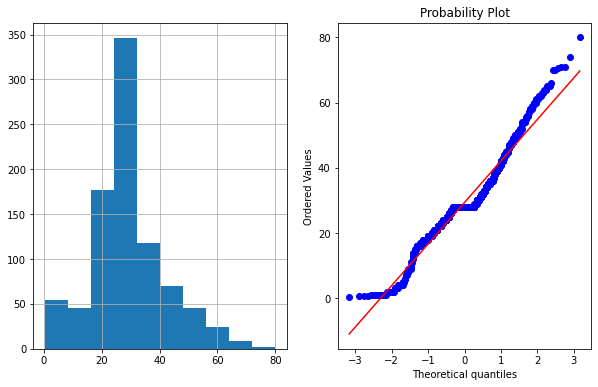

In [204]:
plot_data(df,'Age')

### Lograthic transformation

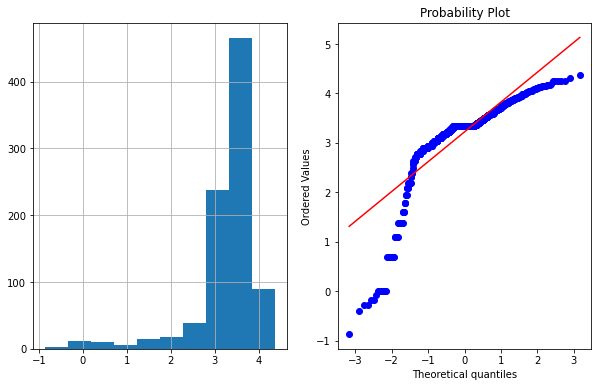

In [205]:
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

### as we see above lograthmic is not suitable for transform the data in guassian distribution . Now we are ggoing with other techniques to transformm the data in huassian distribution

### Reciprocal Transformation

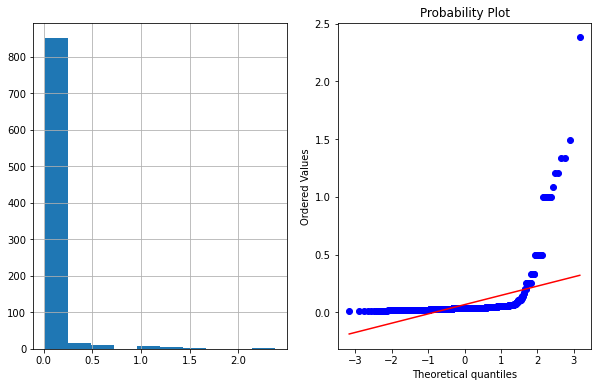

In [206]:
df['age_reciprocal']=1/df.Age
plot_data(df,'age_reciprocal')

#### this techniques is not auitable and it is not transform the data in guassian distribution

### Square root transformation

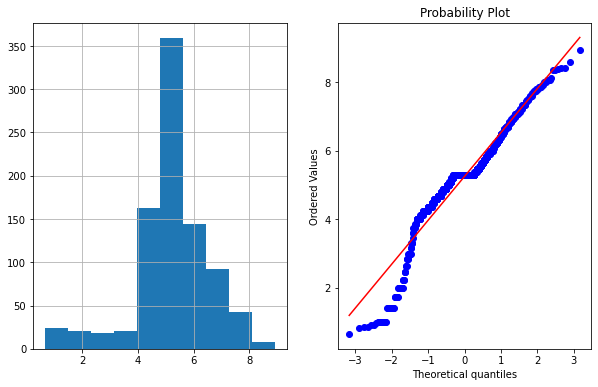

In [207]:
df['age_sq']=df.Age**(1/2)
plot_data(df,'age_sq')

##### This technique is suitable for transform the data into guassian tranfirmation

### Exponential Transformation

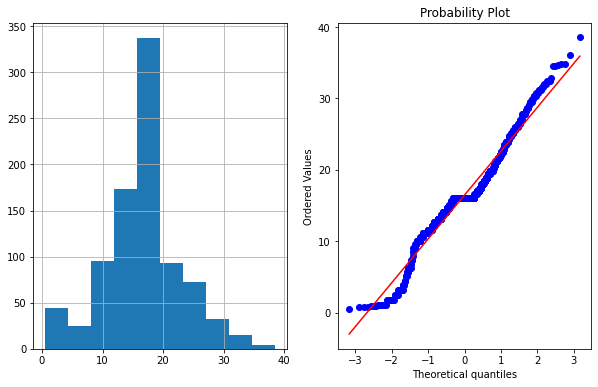

In [208]:
df['age_expo']=df.Age**(1/1.2)
plot_data(df,'age_expo')

##### Till now this texahnique is good 

In [209]:
df['Age_boxcox'],parameters=stat.boxcox(df['Age'])

In [210]:
print(parameters) # lambda (λ) value 

0.7964531473656952


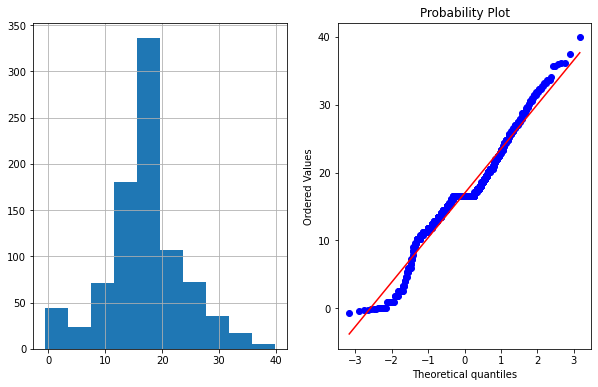

In [211]:
plot_data(df,'Age_boxcox')

### Boxcox is also a good techniques to transform the data into gaussian transformation.

##### It is compulsory to transform all the data into gaussian distribution in linear regression , logistic transformmation etc

## Conclusion 

well i will  not go with the transformation technique because data is already noramly distributed if i want to go than i will use boxcox and exponential transformation for this dataset only

# Normalization vs Standardization

# Normalization(min-max Normalization)

In this approach we will sacle down the value of the features b/w (0 to 1).

# X(norm) = (X - X(min)) / (X(max) - X(min))

In [212]:
import pandas as pd

In [213]:
df=pd.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv', header=None, usecols=[0,1,2])
df.columns=(['Class','Alcohol','Malic'])
df.head()

,Class,Alcohol,Malic
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [214]:
from sklearn.preprocessing import MinMaxScaler

In [215]:
scaling = MinMaxScaler()

In [216]:
scaling.fit_transform(df[['Alcohol','Malic']])

array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ],
       [0.87894737, 0.23913043],
       [0.58157895, 0.36561265],
       [0.83421053, 0.20158103],
       [0.88421053, 0.22332016],
       [0.79736842, 0.27865613],
       [1.        , 0.17786561],
       [0.74473684, 0.12055336],
       [0.80789474, 0.28063241],
       [0.81315789, 0.14624506],
       [0.71578947, 0.19565217],
       [0.97894737, 0.19565217],
       [0.88157895, 0.22332016],
       [0.68421053, 0.21146245],
       [0.86052632, 0.23320158],
       [0.73684211, 0.16403162],
       [0.83157895, 0.16798419],
       [0.68684211, 0.46640316],
       [0.79736842, 0.17588933],
       [0.5       , 0.60474308],
       [0.70526316, 0.22134387],
       [0.47894737, 0.16996047],
       [0.65      , 0.21146245],
       [0.53157895, 0.25889328],
       [0.62105263, 0.20355731],
       [0.59736842, 0.19367589],
       [0.74736842, 0.22924901],
       [0.78684211, 0.18577075],
       [0.

# Standardization (Z-Score Normalization)

Here all  feature will be transform in such a way that it will have the properties of standard normal distribution
with mean(μ=0) and standar deviation (σ=1).

#                  Z = x-μ/σ

In [217]:
from sklearn.preprocessing import StandardScaler

In [218]:
scaling=StandardScaler()

In [219]:
scaling.fit_transform(df[['Alcohol','Malic']])

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377],
       [ 1.48155459, -0.51736664],
       [ 1.71625494, -0.4186237 ],
       [ 1.3086175 , -0.16727801],
       [ 2.25977152, -0.62508622],
       [ 1.0615645 , -0.88540853],
       [ 1.3580281 , -0.15830138],
       [ 1.38273339, -0.76871232],
       [ 0.92568536, -0.54429654],
       [ 2.16095032, -0.54429654],
       [ 1.70390229, -0.4186237 ],
       [ 0.77745356, -0.47248348],
       [ 1.60508109, -0.37374054],
       [ 1.02450655, -0.68792264],
       [ 1.46920194, -0.66996938],
       [ 0.78980621,  0.68550197],
       [ 1.3086175 , -0.63406285],
       [-0.08723191,  1.31386618],
       [ 0.87627476, -0.42760033],
       [-0.18605311, -0.66099274],
       [ 0.61686912, -0.47248348],
       [ 0.06099988, -0.25704433],
       [ 0.48098997, -0.50839001],
       [ 0.36981612, -0.55327317],
       [ 1.07391715,

#### https://www.kaggle.com/matleonard/baseline-model

# what is Outliers?

In [220]:
# What are the criteria to identify the outliers?

1. Data points that falls outside the 1.5 time of an interquartile range above the 3rd quartile and below the 1st quartile.
2. Data points that falls outside of 3 SD. we can use Z-Score and if the Z-Score falls outside of 2 S.D.

# Reason of outliers to exist in data sets?


1. Variability in data.
2. An Experimental measurement errors.

# Imapct to having outliers in datasets?

1. It causes various problem during our statistical analysis.
2. It may causes a significant impact on the mean and standard deviation.

# Various ways of finding outliers?

1. Using scatter plot.
2. Box Plot.
3. Using Z-Score.
4. using the IQR(Interqantile Range).

In [221]:
import numpy as np

In [222]:
data = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,14]

# Detecting Outlier using Z-Score.

Formula for Z-Score = (observation -  mean)/standard deviation

Z = (X-μ)/σ

In [228]:
outlier = []
def find_outlier(data):
    threshold = 3 #(threshold=3 means that the data present in the 3rd Sd is not an ouliers)
    mean = np.mean(data)
    standard_deviation = np.std(data)
    for i in data:
        z_score = (i-mean)/standard_deviation
        if np.abs(z_score) > threshold:
            outlier.append(i)
    return outlier

In [225]:
outliers_point = find_outlier(data)

In [226]:
outliers_point

[107, 108]

In [227]:
# Interquantile Range

75% - 25% values in datasets

# Steps 

1. Arrange the data in increasing order.
2. calculate the first (q1) and 3rd quartile (q3).
3. find interquartile range(q3-q1).
4. find lower bound (q1- interquartile range*1.5)
5. find upper bound (q3+ interquartile range*1.5)
anything that lies outside lower and upper bound is an ouliers.

In [229]:
data

[11,
 10,
 12,
 14,
 12,
 15,
 14,
 13,
 15,
 102,
 12,
 14,
 17,
 19,
 107,
 10,
 13,
 12,
 14,
 12,
 108,
 12,
 11,
 14,
 13,
 15,
 10,
 15,
 12,
 14]

In [230]:
# arrange data in increasing order
sorted(data)

[10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [231]:
q1,q3 = np.percentile(data,[25,75]) # (np.percentile(data,[q1 percentile i.e 25% , q3 percentile i.e 75%]))

In [232]:
print(q1 , q3)

12.0 15.0


In [233]:
# find the IQR
iqr_value = q3-q1
print(iqr_value)

3.0


In [234]:
# find the lower bound and the upper bound value
lower_bound = q1 - (1.5 * iqr_value)
upper_bound = q3 + (1.5 * iqr_value)

In [235]:
print(lower_bound, upper_bound)
# print(upper_bound)

7.5 19.5


if any value that is away from lower_bound value and upper_bound is consider as an outliers